In [203]:
import pandas as pd
import pickle
import torch  

In [204]:
# load outfit_data csv
outfit_data = pd.read_csv('dataset/outfit_data.csv')
print(outfit_data.columns)
# group by outfit and get the list of items 
outfit_data = outfit_data.groupby('cod_outfit')['cod_modelo_color'].apply(list).reset_index(name='items')

Index(['cod_outfit', 'cod_modelo_color'], dtype='object')


In [205]:
# load labels.csv
# load datasets/compatibilities.pickle
with open('dataset/compatibilities.pickle', 'rb') as f:
    compatibilities = pickle.load(f)

# create df frm compatibilities columns cod_modelo_color, community_id from dict items
compatibilities_df = pd.DataFrame.from_dict(compatibilities.items())
compatibilities_df.columns = ['cod_modelo_color', 'community_id']
labels = compatibilities_df
# save as labels.csv
# labels = pd.read_csv('labels.csv')
product_data = pd.read_csv('dataset/product_data.csv')
labels.head()

,cod_modelo_color,community_id
0,53070992-01,0
1,51070902-02,0
2,53010605-09,0
3,53000578-01,0
4,53020724-14,0


In [206]:
columns = ['cod_modelo_color', 'des_agrup_color_eng', 'des_sex', 'des_age',
       'des_line', 'des_fabric', 'des_product_category',
       'des_product_type', 'des_filename']
product_data= product_data[columns]
# merge labels and product_data on cod_modelo_color
df = pd.merge(labels, product_data, on='cod_modelo_color')
df.head()

,cod_modelo_color,community_id,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_type,des_filename
0,53070992-01,0,WHITE,Female,Adult,SHE,P-PLANA,Tops,Top,datathon/images/2019_53070992_01.jpg
1,51070902-02,0,WHITE,Female,Adult,SHE,P-PLANA,Bottoms,Trousers,datathon/images/2019_51070902_02.jpg
2,53010605-09,0,WHITE,Female,Adult,SHE,P-PLANA,Outerwear,Coat,datathon/images/2019_53010605_09.jpg
3,53000578-01,0,WHITE,Female,Adult,SHE,J-JEANS,Bottoms,Jeans,datathon/images/2019_53000578_01.jpg
4,53020724-14,0,YELLOW,Female,Adult,SHE,P-PLANA,Tops,Top,datathon/images/2019_53020724_14.jpg


In [207]:
df["des_age"].unique()

array(['Adult'], dtype=object)

In [208]:
df["des_age"].value_counts()
df["des_sex"].value_counts()

des_sex
Female    8741
Name: count, dtype: int64

In [209]:
# split into X and y
X = df.drop(['community_id'], axis=1)
columns_to_encode = X.columns.difference(["des_filename","cod_modelo_color"])
y = df['community_id']
# convert X into dummies and print the shape
X = pd.get_dummies(X,columns=columns_to_encode)
print(X.shape)


# save to csv
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)


(8741, 115)


In [210]:
y.value_counts()


community_id
33     360
117    176
51     164
11     155
34     151
      ... 
110      4
35       3
18       2
63       2
122      2
Name: count, Length: 124, dtype: int64

compatibilities

In [211]:
# get all unique cateogires for each column
for col in df.columns:
    print(col, df[col].nunique())


cod_modelo_color 8741
community_id 124
des_agrup_color_eng 10
des_sex 1
des_age 1
des_line 2
des_fabric 7
des_product_category 5
des_product_type 87
des_filename 8741


In [220]:
import matplotlib.pyplot as plt
#given a list of paths to images, display them side to side. Modify the path to remove '/datathon'
def display_images(paths):
    fig=plt.figure(figsize=(10, 20))
    columns = 4
    rows = 5
    for i in range(1, min(columns*rows +1, len(paths)+1)):
        img = plt.imread(paths[i-1][9:])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()


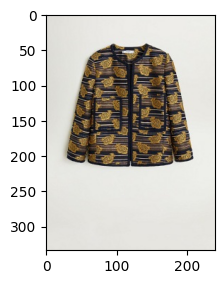

In [224]:
display_images(product_data[product_data['cod_modelo_color'] == '57019037-56']['des_filename'].values)

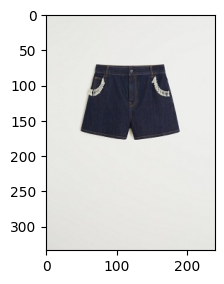

In [229]:
id="57009069-TO"	
display_images(product_data[product_data['cod_modelo_color'] == id]['des_filename'].values)

In [214]:
# get rows with community_id 123
df[df['community_id']==123]

,cod_modelo_color,community_id,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_type,des_filename
8703,57019037-56,123,BLUE,Female,Adult,SHE,P-PLANA,Outerwear,Jacket,datathon/images/2019_57019037_56.jpg
8704,67060562-99,123,GREY,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Handbag,datathon/images/2020_67060562_99.jpg
8705,57039039-96,123,GREY,Female,Adult,SHE,K-CIRCULAR,Bottoms,Trousers,datathon/images/2019_57039039_96.jpg
8706,57039036-38,123,BROWN,Female,Adult,SHE,P-PLANA,Outerwear,Jacket,datathon/images/2019_57039036_38.jpg
8707,67010072-PL,123,GREY,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Earrings,datathon/images/2020_67010072_PL.jpg
8708,67010558-99,123,GREY,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Ankle Boots,datathon/images/2020_67010558_99.jpg
8709,57006312-01,123,WHITE,Female,Adult,SHE,P-PLANA,Tops,Blouse,datathon/images/2019_57006312_01.jpg
8710,57039045-11,123,YELLOW,Female,Adult,SHE,P-PLANA,Tops,Blouse,datathon/images/2019_57039045_11.jpg
8711,57079075-TM,123,BLUE,Female,Adult,SHE,J-JEANS,Bottoms,Trousers,datathon/images/2019_57079075_TM.jpg
8712,57069076-TO,123,BLUE,Female,Adult,SHE,J-JEANS,Bottoms,Trousers,datathon/images/2019_57069076_TO.jpg
